<a href="https://colab.research.google.com/github/sheamusfitz/DSPS_jFitzgerald/blob/master/HW2/HW2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Responses by James (Shea) Fitzgerald @sheamusfitz

 # Homework 2

In [367]:
import pylab as pl
# this package sets up pretty plots
import scipy as sp
import numpy as np
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


# My list of distributions and parameters

In [0]:
#distributions = ['Poisson', 'gaus', 'Chi Squared', 'cauchy', 'lnorm', 'Binomial']
dist_list = ['Gaussian','Poisson', 'Binomial', 'Chi Squared', 'Laplace']
dist_funct={}
mymean=42
mysig=7


# Definitions of the distribution functions

In [0]:
# The seed I was using in particular was 247
numpy.random.seed(247)

###

norm_loc = mymean
norm_sigma = mysig

dist_funct['Gaussian']=sp.stats.norm

###
pois_mu = mymean

dist_funct['Poisson']=sp.stats.poisson
# rvs(mu, loc=0, size=1, random_state=None)

###
binom_n=123
binom_p=mymean/binom_n
  
dist_funct['Binomial']=sp.stats.binom
# rvs(n, p, loc=0, size=1, random_state=None)

###
dist_funct['Chi Squared']=sp.stats.chi2
# rvs(df, loc=0, scale=1, size=1, random_state=None)
chi_df = mymean

###
dist_funct['Laplace']=sp.stats.laplace
# rvs(loc=0, scale=1, size=1, random_state=None)
lap_loc = mymean
lap_scale = mysig

###

data_table = np.empty(500,dtype=object)

# test of assigning a list to an element
# datatable[1] = [1,2]

# test of assigning element as plot type 
# dist_funct['Gaussian'].rvs(loc=norm_mu, scale=norm_sigma, size=5)

###

def rand_length():
  return np.random.randint(10,2000)

# now im going to populate the datatable
for i in range(0,100):
  data_table[i]=dist_funct['Gaussian'].rvs(loc=norm_loc, scale=norm_sigma,\
                                          size=rand_length())
for i in range(100,200):
  data_table[i]=dist_funct['Poisson'].rvs(mu=pois_mu, size=rand_length())

for i in range(200,300):
  data_table[i]=dist_funct['Binomial'].rvs(binom_n,binom_p,size=rand_length())

for i in range(300,400):
  data_table[i]=dist_funct['Chi Squared'].rvs(chi_df, size=rand_length())
  
for i in range(400,500):
  data_table[i]=dist_funct['Laplace'].rvs(loc=lap_loc, scale=lap_scale,\
                                              size=rand_length())
  

# The distribution of values in some arbitrary sample

1505
864


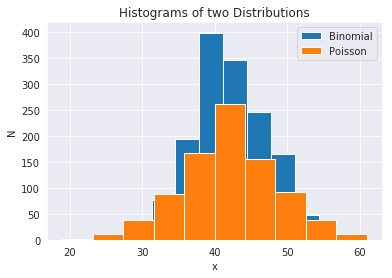

In [370]:
pl.hist(data_table[242], bins = 10, label='Binomial')
pl.hist(data_table[126], bins = 10, label='Poisson')
pl.ylabel('N')
pl.xlabel('x')
pl.title('Histograms of two Distributions')
pl.legend()
print(len(data_table[242]))
print(len(data_table[126]))

### Figure 1: Histogram of 1505 values from a binomial distribution (blue), and 864 values generated from a poisson distribution (orange). Note that both distributions appear to have a mean of approximately 42.

## The mean and standard deviation of the binomial distribution shown in blue in Figure 1

In [371]:
print ("242 mean: %.2f, standard deviation: %.2f"%(data_table[242].mean(), data_table[242].std()))

242 mean: 42.06, standard deviation: 5.13


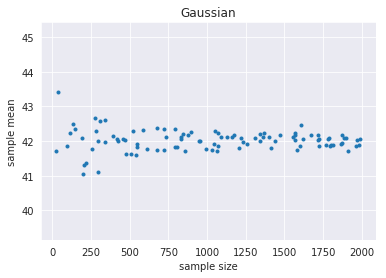

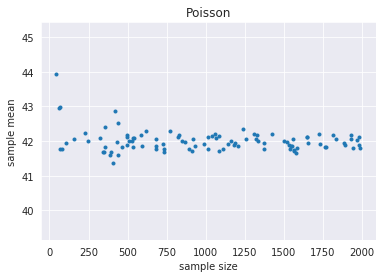

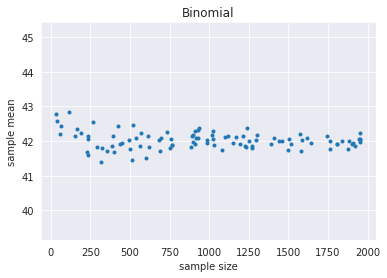

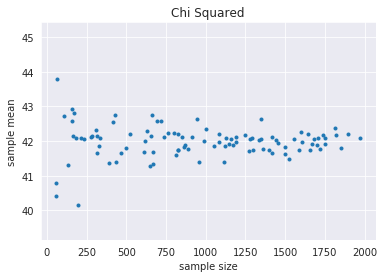

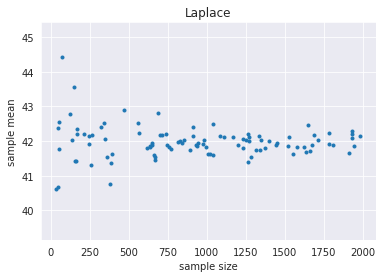

In [378]:
mu_list = np.zeros(500)
for i in range(500):
  mu_list[i]=data_table[i].mean()
  
size_list=np.zeros(500)
for i in range(500):
  size_list[i]=len(data_table[i])

for i in range(5):
  first=100*i
  last =100*(i+1)
  pl.plot(size_list[first:last],mu_list[first:last], '.')
  pl.title(dist_list[i])
  pl.xlabel("sample size")
  pl.ylabel("sample mean")
  pl.ylim(min(mu_list)-1,max(mu_list)+1);
  pl.show();

### Figure 3: The distribution of means for each of the 5 distributions. Note how the means converge towards the distribution mean of 42 with increasing sample size for each distribution, illustrating the Central Limit Theorem.

---

## Below, I find the mean and standard deviation of the list of sample means.

Text(0.5, 1.0, 'Fitting the data to a Gaussian')

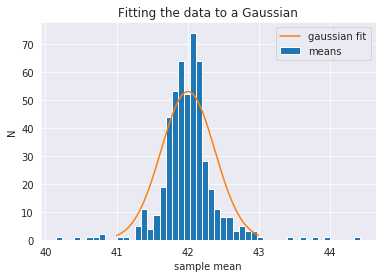

In [377]:
pl.hist(mu_list, bins = 50);
pl.xlabel('sample mean')
pl.ylabel('N');

gauss_fit=np.zeros((2,1000))
for i in range(1000):
  x = 41+i*(2/1000)
  gauss_fit[1][i] = dist_funct['Gaussian'].pdf(x,loc=mu_list.mean(),scale=mu_list.std())*50
  gauss_fit[0][i] = x
  
pl.plot(gauss_fit[0],gauss_fit[1])
pl.legend(('gaussian fit','means'))
pl.title("Fitting the data to a Gaussian")

### Figure 4. The combined sample means fitted to a Gaussian, which is shown along with a histogram of the means. This dataset appears to be more focused around the mean than a Gaussian. This may be due to the fact that the Central Limit Theorem only guarantees that the distribution of means will appoximate a gaussian for a *given* sample size, whereas this dataset uses a wide range of sample sizes.

Text(0.5, 1.0, 'Means, All Sets')

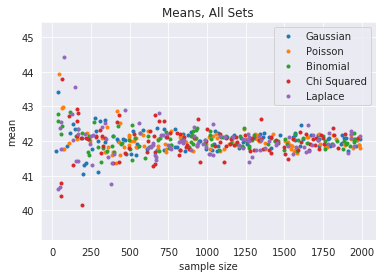

In [375]:
#marker_list=['.', 'v', '^', '+', 'x']
for i in range(5):
  first=100*i
  last =100*(i+1)
  pl.plot(size_list[first:last],mu_list[first:last],
          #marker=marker_list[i],
          '.',
          label="%s"%dist_list[i], linestyle='')
  pl.xlabel("sample size")
  pl.ylabel("mean")
  pl.ylim(min(mu_list)-1,max(mu_list)+1);
pl.legend()
pl.title("Means, All Sets")

### Figure 5: For completeness, the plots of the means of all 5 sets were combined onto one plot. It is not immediately clear that one distribution converges faster or slower than the others.